# Zeynep AFAT 18050111034
# İsmail GÜVEN 18050111016

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# We read the dataframe with pandas library

In [4]:
import pandas as pd
ad = pd.read_csv("HW3Data.csv")
df  = ad.copy()
df.head()

,Days_Corn,Days_Cotton,Corn_NDVI_2013,Cotton_NDVI_2013,Corn_MSAVI_2013,Cotton_MSAVI_2013,Corn_EVI_2013,Cotton_EVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Corn_MSAVI_2014,Cotton_MSAVI_2014,Corn_EVI_2014,Cotton_EVI_2014
0,195,173,0.220787,0.266734,0.138773,0.171675,0.136321,0.168227,0.267668,0.304886,0.169187,0.197476,0.168276,0.195093
1,196,174,0.236955,0.275388,0.147700,0.178417,0.145747,0.175212,0.283176,0.314678,0.179115,0.203764,0.178832,0.201546
2,197,175,0.253122,0.284041,0.156627,0.185160,0.155173,0.182198,0.298683,0.324470,0.189043,0.210052,0.189389,0.207999
3,198,176,0.269290,0.292695,0.165554,0.191902,0.164599,0.189184,0.314191,0.338776,0.198972,0.221653,0.199946,0.220212
4,199,177,0.285457,0.301349,0.174481,0.198645,0.174024,0.196169,0.334603,0.353082,0.211019,0.233255,0.212662,0.232425


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Days_Corn          40 non-null     int64  
 1   Days_Cotton        40 non-null     int64  
 2   Corn_NDVI_2013     40 non-null     float64
 3   Cotton_NDVI_2013   40 non-null     float64
 4   Corn_MSAVI_2013    40 non-null     float64
 5   Cotton_MSAVI_2013  40 non-null     float64
 6   Corn_EVI_2013      40 non-null     float64
 7   Cotton_EVI_2013    40 non-null     float64
 8   Corn_NDVI_2014     40 non-null     float64
 9   Cotton_NDVI_2014   40 non-null     float64
 10  Corn_MSAVI_2014    40 non-null     float64
 11  Cotton_MSAVI_2014  40 non-null     float64
 12  Corn_EVI_2014      40 non-null     float64
 13  Cotton_EVI_2014    40 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 4.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days_Corn,40.0,214.500000,11.690452,195.000000,204.750000,214.500000,224.250000,234.000000
Days_Cotton,40.0,192.500000,11.690452,173.000000,182.750000,192.500000,202.250000,212.000000
Corn_NDVI_2013,40.0,0.554750,0.195304,0.220787,0.380911,0.572270,0.740036,0.809093
Cotton_NDVI_2013,40.0,0.528808,0.173329,0.266734,0.372978,0.526750,0.689864,0.789300
Corn_MSAVI_2013,40.0,0.365223,0.146746,0.138773,0.228983,0.364005,0.507255,0.568205
Cotton_MSAVI_2013,40.0,0.385857,0.151509,0.171675,0.249782,0.371922,0.521289,0.635215
Corn_EVI_2013,40.0,0.369945,0.149321,0.136321,0.231567,0.371020,0.513784,0.575412
Cotton_EVI_2013,40.0,0.390534,0.156852,0.168227,0.249235,0.377562,0.530434,0.647542
Corn_NDVI_2014,40.0,0.607154,0.184446,0.267668,0.451969,0.648168,0.789729,0.813649
Cotton_NDVI_2014,40.0,0.594953,0.173627,0.304886,0.438504,0.615124,0.750930,0.832642


In [7]:
import seaborn as sns

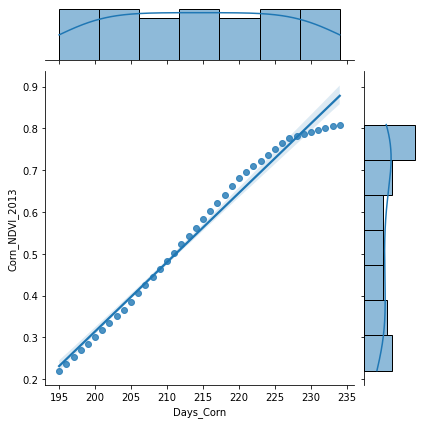

In [8]:
sns.jointplot(x="Days_Corn", y="Corn_NDVI_2013", data=df, kind="reg")

# Manually fit the curve and predict

In [9]:
X = df[["Days_Corn"]].to_numpy()
y = df[["Corn_NDVI_2013"]].to_numpy()

In [10]:
X_b = np.c_[np.ones((40, 1)), X] # add x0 = 1 to each instance

In [11]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)     # fit

In [12]:
w_estimate

array([[-3.00095083],
       [ 0.0165767 ]])

### Manually estimate the Corn EVI 2013

In [138]:
X = df[["Corn_NDVI_2013"]].to_numpy()
y = df[["Corn_EVI_2013"]].to_numpy()

In [139]:
X_b = np.c_[np.ones((40, 1)), X] # add x0 = 1 to each instance

In [140]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

In [141]:
x_new = df[["Corn_NDVI_2013"]].to_numpy()

In [142]:
x_new_b = np.c_[np.ones((40, 1)), x_new] # add x0 = 1 to each instance


In [143]:
y_predict = x_new_b.dot(w_estimate)          # predict


### Plotting the manually estimated Corn_EVI_2013

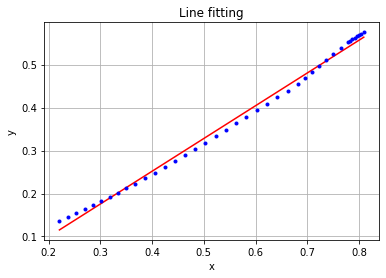

In [144]:
plt.plot(x_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.grid()
plt.title("Line fitting")
plt.xlabel("x")
plt.ylabel("y");

### Finding MSE with Numpy arrays

In [145]:
df['y_predicted'] = y_predict

In [146]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

print(mse(df['Corn_NDVI_2013'], df['y_predicted']))

0.03625086032198451


### Fitting curve with scikit - linear regression for Corn Days and Cron NDVI

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
reg= LinearRegression()
model = reg.fit(df[['Days_Corn']],df[['Corn_NDVI_2013']])

In [149]:
model.intercept_

array([-3.00095083])

In [150]:
model.coef_

array([[0.0165767]])

C:\Users\test\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


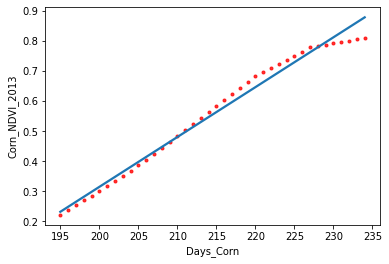

In [151]:
g = sns.regplot(df["Days_Corn"], df["Corn_NDVI_2013"], ci= None, scatter_kws={'color':'r' , 's': 9})


### Predicted the Corn_EVI_2013 with scikit learn and plotted the findings

In [152]:
model = reg.fit(df[['Corn_NDVI_2013']],df[['Corn_EVI_2013']])

In [153]:
y_predict = model.predict(df[['Corn_NDVI_2013']])

In [154]:
y_predict[0:10]

array([[0.1153023 ],
       [0.12762986],
       [0.13995743],
       [0.15228499],
       [0.16461255],
       [0.17694011],
       [0.18926767],
       [0.20159523],
       [0.2139228 ],
       [0.22625036]])

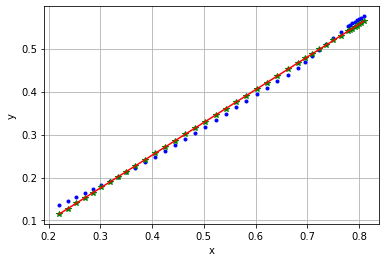

In [155]:
plt.plot(df['Corn_NDVI_2013'],df['Corn_EVI_2013'],  "b.")
plt.plot(df['Corn_NDVI_2013'], y_predict, "g*")
plt.plot(df['Corn_NDVI_2013'], y_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

# MSE and RMSE for Corn EVI and Corn NDVI

In [156]:
df['y_predicted'] = y_predict
df.head()

,Days_Corn,Days_Cotton,Corn_NDVI_2013,Cotton_NDVI_2013,Corn_MSAVI_2013,Cotton_MSAVI_2013,Corn_EVI_2013,Cotton_EVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Corn_MSAVI_2014,Cotton_MSAVI_2014,Corn_EVI_2014,Cotton_EVI_2014,y_predicted
0,195,173,0.220787,0.266734,0.138773,0.171675,0.136321,0.168227,0.267668,0.304886,0.169187,0.197476,0.168276,0.195093,0.115302
1,196,174,0.236955,0.275388,0.147700,0.178417,0.145747,0.175212,0.283176,0.314678,0.179115,0.203764,0.178832,0.201546,0.127630
2,197,175,0.253122,0.284041,0.156627,0.185160,0.155173,0.182198,0.298683,0.324470,0.189043,0.210052,0.189389,0.207999,0.139957
3,198,176,0.269290,0.292695,0.165554,0.191902,0.164599,0.189184,0.314191,0.338776,0.198972,0.221653,0.199946,0.220212,0.152285
4,199,177,0.285457,0.301349,0.174481,0.198645,0.174024,0.196169,0.334603,0.353082,0.211019,0.233255,0.212662,0.232425,0.164613


In [157]:
mse = mean_squared_error(df['Corn_NDVI_2013'], df['y_predicted'])
print(mse)

0.03625086032198451


In [158]:
rmse = np.sqrt(mse)
rmse

0.1903965869494107

### Predicted the Corn_MSAVI_2013 with scikit learn and plotted the findings

In [159]:
model = reg.fit(df[['Corn_NDVI_2013']],df[['Corn_MSAVI_2013']])

In [160]:
corn_msavi_predict = model.predict(df[['Corn_NDVI_2013']])

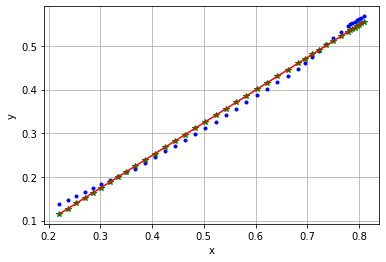

In [161]:
plt.plot( df['Corn_NDVI_2013'],df['Corn_MSAVI_2013'], "b.")
plt.plot( df['Corn_NDVI_2013'],corn_msavi_predict, "g*")
plt.plot( df['Corn_NDVI_2013'],corn_msavi_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

### Predicted the Corn_EVI_2014 with scikit learn and plotted the findings

In [100]:
model = reg.fit(df[['Corn_NDVI_2013']],df[['Corn_EVI_2014']])

In [101]:
y_predict = model.predict(df[['Corn_NDVI_2013']])

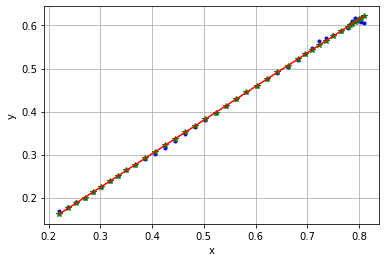

In [103]:
plt.plot( df['Corn_NDVI_2013'],df['Corn_EVI_2014'], "b.")
plt.plot(df['Corn_NDVI_2013'], y_predict, "g*")
plt.plot(df['Corn_NDVI_2013'], y_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");


### Predicted the Corn_EVI_2014 with scikit learn and plotted the findings

In [104]:
model = reg.fit(df[['Corn_NDVI_2013']],df[['Corn_MSAVI_2014']])

In [105]:
y_predict = model.predict(df[['Corn_NDVI_2013']])

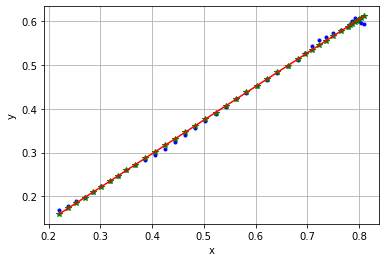

In [106]:
plt.plot(df['Corn_NDVI_2013'],df['Corn_MSAVI_2014'],  "b.")
plt.plot(df['Corn_NDVI_2013'], y_predict, "g*")
plt.plot(df['Corn_NDVI_2013'], y_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

### Fitted the curve for Cotton with linear regression and plotted

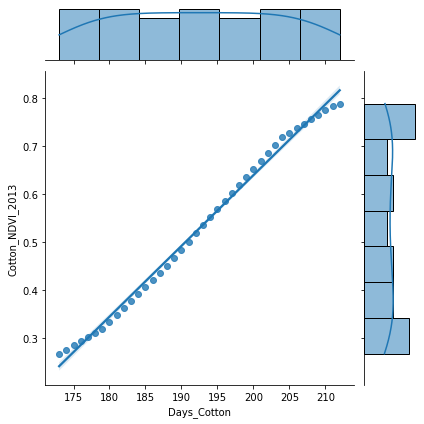

In [43]:
sns.jointplot(x="Days_Cotton", y="Cotton_NDVI_2013", data=df, kind="reg")

### Linear regression for cotton with Scikit 

In [44]:
reg= LinearRegression()
model2 = reg.fit(df[["Days_Cotton"]],df[["Cotton_NDVI_2013"]])

In [45]:
model2.intercept_, model2.coef_

(array([-2.31754155]), array([[0.01478623]]))

### Linear Regression for Cotton with Normal Equation

In [46]:
X = df[["Days_Cotton"]].to_numpy()
y = df[["Cotton_NDVI_2013"]].to_numpy()

In [47]:
X_b = np.c_[np.ones((40, 1)), X] # add x0 = 1 to each instance

In [48]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  
w_estimate

array([[-2.31754155],
       [ 0.01478623]])

### Estimated the Cotton EVI 2013 with normal Equation and plotted the findings

In [113]:
X = df[["Cotton_NDVI_2013"]].to_numpy()
y = df[["Cotton_EVI_2013"]].to_numpy()

In [114]:
X_b = np.c_[np.ones((40, 1)), X] # add x0 = 1 to each instance

In [115]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  
w_estimate

array([[-0.08688236],
       [ 0.90281656]])

In [116]:
x_new = df[["Corn_NDVI_2013"]].to_numpy()

In [117]:
x_new_b = np.c_[np.ones((40, 1)), x_new] # add x0 = 1 to each instance

In [118]:
y_predict = x_new_b.dot(w_estimate)          # predict

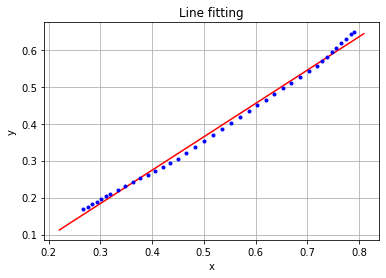

In [119]:
plt.plot(x_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.grid()
plt.title("Line fitting")
plt.xlabel("x")
plt.ylabel("y");

### Finding MSE with Numpy arrays

In [120]:
df['y_predicted'] = y_predict

In [121]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

print(mse(df['Cotton_NDVI_2013'], df['y_predicted']))

0.013500868703314253


### Predicted Cotton_EVI_2013 with our model and plotted

In [122]:
model2 = reg.fit(df[["Cotton_NDVI_2013"]],df[["Cotton_EVI_2013"]])

In [123]:
b_predict = model2.predict(df[["Cotton_NDVI_2013"]])

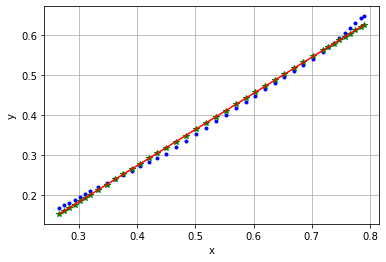

In [124]:
plt.plot(df['Cotton_NDVI_2013'],df['Cotton_EVI_2013'],  "b.")
plt.plot(df['Cotton_NDVI_2013'], b_predict, "g*")
plt.plot(df['Cotton_NDVI_2013'], b_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

# MSE and RMSE for Cotton EVI and Cotton NDVI

In [125]:
df['y_predicted'] = b_predict
df.head()

,Days_Corn,Days_Cotton,Corn_NDVI_2013,Cotton_NDVI_2013,Corn_MSAVI_2013,Cotton_MSAVI_2013,Corn_EVI_2013,Cotton_EVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Corn_MSAVI_2014,Cotton_MSAVI_2014,Corn_EVI_2014,Cotton_EVI_2014,y_predicted
0,195,173,0.220787,0.266734,0.138773,0.171675,0.136321,0.168227,0.267668,0.304886,0.169187,0.197476,0.168276,0.195093,0.153929
1,196,174,0.236955,0.275388,0.147700,0.178417,0.145747,0.175212,0.283176,0.314678,0.179115,0.203764,0.178832,0.201546,0.161742
2,197,175,0.253122,0.284041,0.156627,0.185160,0.155173,0.182198,0.298683,0.324470,0.189043,0.210052,0.189389,0.207999,0.169555
3,198,176,0.269290,0.292695,0.165554,0.191902,0.164599,0.189184,0.314191,0.338776,0.198972,0.221653,0.199946,0.220212,0.177368
4,199,177,0.285457,0.301349,0.174481,0.198645,0.174024,0.196169,0.334603,0.353082,0.211019,0.233255,0.212662,0.232425,0.185181


In [126]:
mse = mean_squared_error(df['Cotton_NDVI_2013'], df['y_predicted'])
print(mse)

0.019396278222964074


In [127]:
rmse = np.sqrt(mse)
rmse

0.13927052173006343

### Predicted Cotton_MSAVI_2013 with our model and plotted

In [129]:
model2 = reg.fit(df[["Cotton_NDVI_2013"]],df[["Cotton_MSAVI_2013"]])

In [130]:
cotton_msavi_predict = model2.predict(df[["Cotton_NDVI_2013"]])

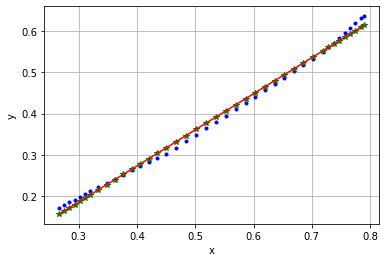

In [131]:
plt.plot( df['Cotton_NDVI_2013'], df['Cotton_MSAVI_2013'],"b.")
plt.plot(df['Cotton_NDVI_2013'], cotton_msavi_predict, "g*")
plt.plot(df['Cotton_NDVI_2013'], cotton_msavi_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

### Predicted Cotton_EVI_2014 with our model and plotted

In [132]:
model2 = reg.fit(df[["Cotton_NDVI_2013"]],df[["Cotton_EVI_2014"]])

In [133]:
cotton_evi_predict = model2.predict(df[["Cotton_NDVI_2013"]])

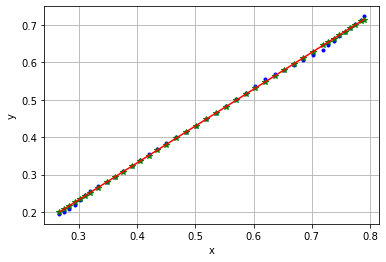

In [134]:
plt.plot(df['Cotton_NDVI_2013'],df['Cotton_EVI_2014'],  "b.")
plt.plot(df['Cotton_NDVI_2013'], cotton_evi_predict, "g*")
plt.plot(df['Cotton_NDVI_2013'], cotton_evi_predict, "r-")
plt.grid()

plt.xlabel("x")
plt.ylabel("y");

### Predicted Cotton_MSAVI_2014 with our model and plotted

In [135]:
model2 = reg.fit(df[["Cotton_NDVI_2013"]],df[["Cotton_MSAVI_2014"]])

In [136]:
cotton_msavi_predict = model2.predict(df[["Cotton_NDVI_2013"]])

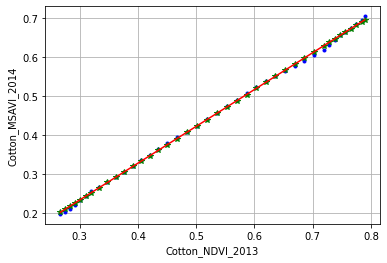

In [137]:
plt.plot(df["Cotton_NDVI_2013"],df["Cotton_MSAVI_2014"],  "b.")
plt.plot(df["Cotton_NDVI_2013"], cotton_msavi_predict, "g*")
plt.plot(df["Cotton_NDVI_2013"], cotton_msavi_predict, "r-")
plt.grid()

plt.xlabel("Cotton_NDVI_2013")
plt.ylabel("Cotton_MSAVI_2014");

# Conclusion

### In this project we did linear regression both using Normal Equation and Scikit Learn. First of all we fit the data with days and NDVI created our model. Then we used curve fitting for estimate EVI, MSAVI values from 2013 and 2014 years using the NDVI and plotted the values and findings. We saw that using Scikit Learn is easier than using Normal Equation especially dealing with huge datasets. Then we found the errors with doing manually and Scikit. For Cotton MSE with Scikit learn is bigger then our defined function but for corn we determined the MSE values are same. Hence, our model with scikit learn overall gives the better solution than Normal Equation. 